In [1]:
import pandas as pd
import numpy as np

In [245]:
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional scklearn functions
import xgboost as xgb
import random
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc,recall_score,precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

from sklearn import preprocessing

In [203]:
testSet = pd.read_csv("data/test_set_num_cat_no_null.csv").drop(columns = "Unnamed: 0")
print testSet.shape
testSet.head(10)

(19415, 2502)


,person,Enero_cantEventos,Enero_checkouts,Enero_leads,Enero_conversiones,Enero_staticPageVisitadas,Enero_ProductosVistosPorUser,Enero_productosBuscados,Enero_accesos por marketing online,Enero_searchEngine,...,F13_region_fh81-Mayo,F13_region_fh82-Mayo,F13_region_fh83-Mayo,F13_region_fh84-Mayo,F13_region_fh85-Mayo,F13_device_type_fh1-Mayo,F13_device_type_fh2-Mayo,F13_device_type_fh3-Mayo,F13_device_type_fh4-Mayo,F13_device_type_fh5-Mayo
0,00091926,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,1.0,1.0,-1.0,1.0,1.0,0.0
1,00091a7a,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,000ba417,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
3,000e4d9e,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
4,000e619d,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
5,001001be,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
6,0010e89a,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
7,0016c4b5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
8,001804a2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
9,001a2273,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0


In [204]:
trocafone = testSet.iloc[:,:1]
print trocafone.shape
print testSet.shape
testSet = testSet.drop(columns = "person")
testSet.head(10)

(19415, 1)
(19415, 2502)


,Enero_cantEventos,Enero_checkouts,Enero_leads,Enero_conversiones,Enero_staticPageVisitadas,Enero_ProductosVistosPorUser,Enero_productosBuscados,Enero_accesos por marketing online,Enero_searchEngine,Enero_accesos a la homepage,...,F13_region_fh81-Mayo,F13_region_fh82-Mayo,F13_region_fh83-Mayo,F13_region_fh84-Mayo,F13_region_fh85-Mayo,F13_device_type_fh1-Mayo,F13_device_type_fh2-Mayo,F13_device_type_fh3-Mayo,F13_device_type_fh4-Mayo,F13_device_type_fh5-Mayo
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,1.0,1.0,-1.0,1.0,1.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
7,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
8,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0


In [205]:
trainSet = pd.read_csv("data/train_set_NOT_UNDER_num_cat_no_null.csv")#.drop(columns = "Unnamed: 0")
trainSet.head()

,person,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,...,F13_region_fh82-Mayo,F13_region_fh83-Mayo,F13_region_fh84-Mayo,F13_region_fh85-Mayo,F13_device_type_fh1-Mayo,F13_device_type_fh2-Mayo,F13_device_type_fh3-Mayo,F13_device_type_fh4-Mayo,F13_device_type_fh5-Mayo,label
0,0008ed71,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0,0
1,000c79fe,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0
2,001802e4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.0,0
3,0019e639,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0,0
4,001b0bf9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [207]:
trainSet.shape

(19414, 2503)

#### SubMuestreo o undersample

0    18434
1      980
Name: label, dtype: int64


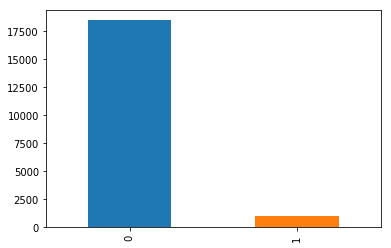

In [208]:
#Datos sin muestrear
import matplotlib.pyplot as plt
# graficos incrustados
%matplotlib inline
print trainSet['label'].value_counts()
trainSet['label'].value_counts().plot(kind= 'bar')

In [209]:
#1.Encuentra el número de muestras que son conversiones
sizeConversiones = len(trainSet[trainSet['label'] == 1])*6 #80/20--4   70/30---2

In [210]:
#2. Obtener índices de muestras de no conversiones.
no_conversiones_indices = trainSet[trainSet.label == 0].index 

In [211]:
#Muestras aleatorias de índices de no conversiones.
#GENERO SEMILLA CON 3 PORQUE SI, EN REALIDAD PORQUE BRINDA UN NUMERO BAJO COMO 46
np.random.seed(3)
random_indices_no_conversiones = np.random.choice(no_conversiones_indices,sizeConversiones, replace=False)

In [212]:
#4. Encuentra los índices de muestras de conversiones.
conversiones = trainSet[trainSet.label == 1].index

In [213]:
#5. Índices de conversiones concat con muestras de no conversiones.
under_sample_indices = np.concatenate([conversiones,random_indices_no_conversiones])

In [214]:
#6 Obtener Balance Dataframe
under_sample = trainSet.loc[under_sample_indices]

In [215]:
under_sample = under_sample.sort_values(by='person')
under_sample['label'].value_counts()

0    5880
1     980
Name: label, dtype: int64

### Visualización de datos submuestreados

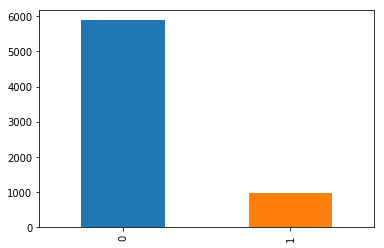

In [216]:
under_sample['label'].value_counts().plot(kind='bar')

In [217]:
print trainSet.shape
under_sample.shape
#dimensiones de trainset:(1960, 2503)

(19414, 2503)


(6860, 2503)

In [218]:
y = under_sample["label"].values
X = under_sample.iloc[:,:-1].drop(columns = "person").values

In [219]:


#Spliteo con shuffle=False es decir ordenado
X_under_train, X_under_test, y_under_train, y_under_test =\
train_test_split(X,y,test_size = 0.4,shuffle = False)

In [220]:
print(X_under_train.shape)
print(y_under_train.shape)
print(X_under_test.shape)
print(y_under_test.shape)

print(X_under_train)
print(y_under_train)
print(X_under_test)
print(y_under_test)

(4116L, 2501L)
(4116L,)
(2744L, 2501L)
(2744L,)
[[ 0.  0.  0. ...  1.  1.  0.]
 [ 0.  0.  0. ...  1.  1.  0.]
 [ 0.  0.  0. ...  0.  0. -1.]
 ...
 [ 0.  0.  0. ...  0.  0. -1.]
 [ 0.  0.  0. ...  1.  1.  0.]
 [ 0.  0.  0. ...  0.  0. -1.]]
[0 0 1 ... 0 0 0]
[[ 0.  0.  0. ...  0.  0. -1.]
 [ 0.  0.  0. ...  0.  0. -1.]
 [ 0.  0.  0. ...  0.  0. -1.]
 ...
 [ 0.  0.  0. ...  0.  0. -1.]
 [ 0.  0.  0. ...  0.  0. -1.]
 [ 0.  0.  0. ...  1.  1.  0.]]
[0 0 0 ... 0 0 0]


Hiper-parámetros:

* **num_boost_round:** cantidad de árboles a contruir (n_estimators)
* **metrics:** la métrica de evaluación a utilizar

* **early_stopping_rounds:** terminar antes si la métrica no mejora luego de una cantidad de pasadas
* **seed:** semilla para poder reproducir los resultados

In [222]:

def xgboost(self, train_X, train_y, test_X, params=None, num_boost_round=32):
        if params is None:
            params = {'objective': 'multi:softprob',
                      'eval_metric': 'mlogloss',
                      'colsample_bytree': 0.55,
                      'min_child_weight': 9.0, 
                      'subsample': 1.0, 
                      'learning_rate': 0.03,
                      'eta': 0.2, 
                      'max_depth': 7.0, 
                      'gamma': 0.75,
                      'num_class': 2,
                      'n_estimators': 580.0
                      }
        dtrain = xgb.DMatrix(train_X, label=train_y)
        dtest = xgb.DMatrix(test_X)
        self.bst = xgb.train(params, dtrain, num_boost_round=32)
        test_y = self.bst.predict(dtest)
        # self.classifier = XGBClassifier(max_depth=6, learning_rate=0.01, n_estimators=550, subsample=0.5, colsample_bytree=0.5, seed=seed)
        # self.classifier.fit(train_X, train_y)
        # test_y = self.classifier.predict_proba(test_X)[:, 1]
        return test_y 


In [223]:
params = {
    'n_estimators':800,
    'objective': 'binary:logistic',
    'learning_rate': 0.01,
    'gamma':0.0,
    'subsample':0.80,
    'colsample_bytree':0.3,
    'min_child_weight':7,
    'max_depth':3,
    'reg_alpha':0.011,
    #'nthread':4,
    'scale_pos_weight':6,
    'seed':1024,
    }

In [263]:
predict_train = xgboost(xgb,X_under_train,y_under_train, X_under_test,params)

[15:19:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:19:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:19:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:19:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:19:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:19:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:19:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

In [264]:
print(recall_score(y_under_test, predict_train.round()))
print(accuracy_score(y_under_test, predict_train.round()))

0.7180156657963447
0.8035714285714286


In [226]:
testSet.head()

,Enero_cantEventos,Enero_checkouts,Enero_leads,Enero_conversiones,Enero_staticPageVisitadas,Enero_ProductosVistosPorUser,Enero_productosBuscados,Enero_accesos por marketing online,Enero_searchEngine,Enero_accesos a la homepage,...,F13_region_fh81-Mayo,F13_region_fh82-Mayo,F13_region_fh83-Mayo,F13_region_fh84-Mayo,F13_region_fh85-Mayo,F13_device_type_fh1-Mayo,F13_device_type_fh2-Mayo,F13_device_type_fh3-Mayo,F13_device_type_fh4-Mayo,F13_device_type_fh5-Mayo
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,1.0,1.0,-1.0,1.0,1.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0


In [227]:
T = testSet.values

In [228]:
predict_final = xgboost(xgb,X_under_train,y_under_train, T,params,32)

[14:58:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:58:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:58:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:58:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:58:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:58:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:58:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

In [229]:

print(recall_score(y_under_test, predict.round()))
print(accuracy_score(y_under_test, predict.round()))

0.7180156657963447
0.8035714285714286


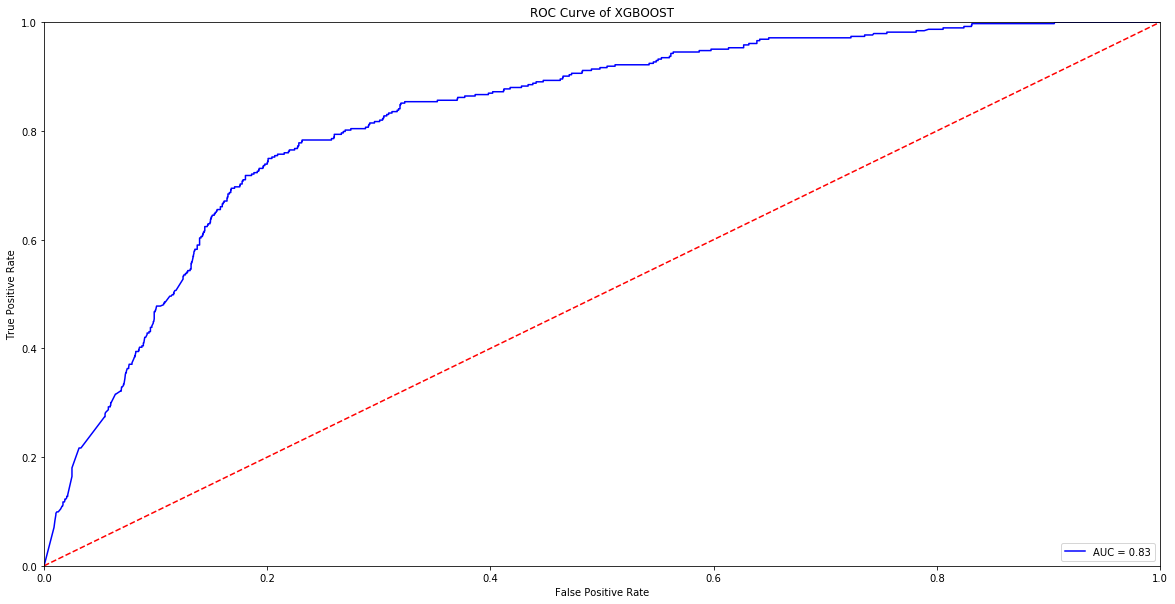

In [232]:
#GRAFICO DE CURVA AUR-ROC PARA MOST-IMPORTANT
#SOLO SE DEBE REEMPLAZAR LOS LABELS Y LAS PREDICCIONES EN roc_curve

fpr, tpr, threshold = roc_curve(y_under_test, predict)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of XGBOOST')
plt.show()

In [233]:
trocafone['label'] = predict_final
trocafone.head()

,person,label
0,00091926,0.463463
1,00091a7a,0.584559
2,000ba417,0.497824
3,000e4d9e,0.478334
4,000e619d,0.492287


In [238]:
print ("Cantidad de No-Conversiones y Conversiones")
np.around(trocafone['label']).value_counts()

Cantidad de No-Conversiones y Conversiones


0.0    15416
1.0     3999
Name: label, dtype: int64

### COMIENZA LA BUSQUEDA DE PARAMETROS

In [239]:
trainSet.shape

(19414, 2503)

In [240]:
under_sample.shape

(6860, 2503)

In [248]:
train = under_sample
target = 'label'
IDcol = 'person'

In [249]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=30):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['label'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['label'].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['label'], dtrain_predprob)

    

In [250]:
def modelfit2(alg, dtrain, predictors,dtest,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['label'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    dtest_predprob = alg.predict_proba(dtest[predictors])[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['label'].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['label'], dtrain_predprob)
    
    return dtest_predprob

In [252]:
#Choose all predictors except target & IDcols
train = under_sample
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb1 = XGBClassifier(
 learning_rate =0.05,
 n_estimators=100,
 max_depth=3,
 min_child_weight=6,
 gamma=0.0,
 subsample=0.8,
 colsample_bytree=0.2,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=6, #2940/980=3
 seed=1024)
modelfit(xgb1, train, predictors)

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.8074
AUC Score (Train): 0.890180


In [253]:
modelfit(xgb1, train, predictors,True,5,30)

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.8074
AUC Score (Train): 0.890180


In [254]:
del testSet
testSet = pd.read_csv("data/test_set_num_cat_no_null.csv").drop(columns = "Unnamed: 0")
print testSet.shape
testSet.head(10)

(19415, 2502)


,person,Enero_cantEventos,Enero_checkouts,Enero_leads,Enero_conversiones,Enero_staticPageVisitadas,Enero_ProductosVistosPorUser,Enero_productosBuscados,Enero_accesos por marketing online,Enero_searchEngine,...,F13_region_fh81-Mayo,F13_region_fh82-Mayo,F13_region_fh83-Mayo,F13_region_fh84-Mayo,F13_region_fh85-Mayo,F13_device_type_fh1-Mayo,F13_device_type_fh2-Mayo,F13_device_type_fh3-Mayo,F13_device_type_fh4-Mayo,F13_device_type_fh5-Mayo
0,00091926,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,1.0,1.0,-1.0,1.0,1.0,0.0
1,00091a7a,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,000ba417,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
3,000e4d9e,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
4,000e619d,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
5,001001be,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
6,0010e89a,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
7,0016c4b5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
8,001804a2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
9,001a2273,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0


### VERIFICAMOS QUE LOS NOMBRES SON LOS MISMOS PERO DIFIEREN EN SU ESCRITURA, NORMALIZAMOS A LOS DE TRAIN

In [255]:
train.columns

Index([u'person', u'Enero - cantidadEventos', u'Enero - checkouts',
       u'Enero - leads', u'Enero - conversiones',
       u'Enero - staticPageVisitadas', u'Enero - ProductosVistosPorUser',
       u'Enero - productosBuscados', u'Enero - accesos por marketing online',
       u'Enero - searchEngine',
       ...
       u'F13_region_fh82-Mayo', u'F13_region_fh83-Mayo',
       u'F13_region_fh84-Mayo', u'F13_region_fh85-Mayo',
       u'F13_device_type_fh1-Mayo', u'F13_device_type_fh2-Mayo',
       u'F13_device_type_fh3-Mayo', u'F13_device_type_fh4-Mayo',
       u'F13_device_type_fh5-Mayo', u'label'],
      dtype='object', length=2503)

In [256]:
testSet.columns

Index([u'person', u'Enero_cantEventos', u'Enero_checkouts', u'Enero_leads',
       u'Enero_conversiones', u'Enero_staticPageVisitadas',
       u'Enero_ProductosVistosPorUser', u'Enero_productosBuscados',
       u'Enero_accesos por marketing online', u'Enero_searchEngine',
       ...
       u'F13_region_fh81-Mayo', u'F13_region_fh82-Mayo',
       u'F13_region_fh83-Mayo', u'F13_region_fh84-Mayo',
       u'F13_region_fh85-Mayo', u'F13_device_type_fh1-Mayo',
       u'F13_device_type_fh2-Mayo', u'F13_device_type_fh3-Mayo',
       u'F13_device_type_fh4-Mayo', u'F13_device_type_fh5-Mayo'],
      dtype='object', length=2502)

In [257]:
prueba= train.columns
prueba=prueba.drop('label')
testSet.columns=prueba
testSet.columns

Index([u'person', u'Enero - cantidadEventos', u'Enero - checkouts',
       u'Enero - leads', u'Enero - conversiones',
       u'Enero - staticPageVisitadas', u'Enero - ProductosVistosPorUser',
       u'Enero - productosBuscados', u'Enero - accesos por marketing online',
       u'Enero - searchEngine',
       ...
       u'F13_region_fh81-Mayo', u'F13_region_fh82-Mayo',
       u'F13_region_fh83-Mayo', u'F13_region_fh84-Mayo',
       u'F13_region_fh85-Mayo', u'F13_device_type_fh1-Mayo',
       u'F13_device_type_fh2-Mayo', u'F13_device_type_fh3-Mayo',
       u'F13_device_type_fh4-Mayo', u'F13_device_type_fh5-Mayo'],
      dtype='object', length=2502)

In [265]:
#GENERAMOS EL ARCHIVO CON PARAMETROS COLOCADOS A "OJO"
predict_base=modelfit2(xgb1, train, predictors,testSet)

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.8074
AUC Score (Train): 0.890180


In [266]:
modelo_base=predict_base.round()
modelo_base

array([0., 1., 0., ..., 1., 1., 0.], dtype=float32)

In [268]:
df_base=pd.DataFrame({'person':testSet['person']})
df_base['label']=predict_test
df_base.head()

,person,label
0,00091926,0.311707
1,00091a7a,0.761622
2,000ba417,0.457189
3,000e4d9e,0.392742
4,000e619d,0.559149


In [272]:
df_base.to_csv('submit_kaggle/sub010_modelo3_xGBoost.csv', index=False)

In [273]:
np.around(trocafone['label']).value_counts()

0.0    15416
1.0     3999
Name: label, dtype: int64

In [271]:
np.around(df_base['label']).value_counts()

0.0    14739
1.0     4676
Name: label, dtype: int64

### COMENZAMOS CON EL TUNING DE LOS PARAMETROS

In [31]:
#BUSCAMOS CUANTOS ESTIMADORES GENERAR
param_test0 = {
 'n_estimators':range(50, 400, 50),
}
gsearch0 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.05, n_estimators=500, max_depth=6,
 min_child_weight=3, gamma=0.1, subsample=0.8, colsample_bytree=0.3,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test0, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch0.fit(train[predictors],train[target])
gsearch0.grid_scores_, gsearch0.best_params_, gsearch0.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84430, std: 0.00829, params: {'n_estimators': 50},
  mean: 0.84436, std: 0.00726, params: {'n_estimators': 100},
  mean: 0.84178, std: 0.00748, params: {'n_estimators': 150},
  mean: 0.83951, std: 0.00657, params: {'n_estimators': 200},
  mean: 0.83728, std: 0.00554, params: {'n_estimators': 250},
  mean: 0.83426, std: 0.00463, params: {'n_estimators': 300},
  mean: 0.83257, std: 0.00388, params: {'n_estimators': 350}],
 {'n_estimators': 100},
 0.8443573858114675)

In [32]:
## AFINAMOS LA CANTIDAD DE ESTIMADORES
param_test0 = {
 'n_estimators':range(100, 150, 10),
 #'min_child_weight':[3]
}
gsearch0 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.05, n_estimators=500, max_depth=6,
 min_child_weight=3, gamma=0.1, subsample=0.8, colsample_bytree=0.3,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test0, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch0.fit(train[predictors],train[target])
gsearch0.grid_scores_, gsearch0.best_params_, gsearch0.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84436, std: 0.00726, params: {'n_estimators': 100},
  mean: 0.84397, std: 0.00706, params: {'n_estimators': 110},
  mean: 0.84361, std: 0.00688, params: {'n_estimators': 120},
  mean: 0.84290, std: 0.00699, params: {'n_estimators': 130},
  mean: 0.84267, std: 0.00739, params: {'n_estimators': 140}],
 {'n_estimators': 100},
 0.8443573858114675)

In [33]:
#FINALMENTE ENCONTRAMOS EL PARAMETRO ADECUADO PARA LA CANTIDAD DE ESTIMADORES
param_test0 = {
 'n_estimators':range(50,100, 10),
 #'min_child_weight':[3]
}
gsearch0 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.05, n_estimators=500, max_depth=6,
 min_child_weight=3, gamma=0.1, subsample=0.8, colsample_bytree=0.3,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test0, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch0.fit(train[predictors],train[target])
gsearch0.grid_scores_, gsearch0.best_params_, gsearch0.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84430, std: 0.00829, params: {'n_estimators': 50},
  mean: 0.84500, std: 0.00808, params: {'n_estimators': 60},
  mean: 0.84504, std: 0.00826, params: {'n_estimators': 70},
  mean: 0.84468, std: 0.00793, params: {'n_estimators': 80},
  mean: 0.84477, std: 0.00741, params: {'n_estimators': 90}],
 {'n_estimators': 70},
 0.8450419963903929)

In [34]:
#SE CONTINUA CON LA BUSQUEDA DE max_depth Y min_child_weight
param_test1 = {
 'max_depth':range(1,10,2),
 'min_child_weight':range(2,8,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.05, n_estimators=70, max_depth=6,
 min_child_weight=3, gamma=0.1, subsample=0.8, colsample_bytree=0.3,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.83680, std: 0.00824, params: {'max_depth': 1, 'min_child_weight': 2},
  mean: 0.83680, std: 0.00824, params: {'max_depth': 1, 'min_child_weight': 4},
  mean: 0.83680, std: 0.00824, params: {'max_depth': 1, 'min_child_weight': 6},
  mean: 0.84793, std: 0.00813, params: {'max_depth': 3, 'min_child_weight': 2},
  mean: 0.84882, std: 0.00698, params: {'max_depth': 3, 'min_child_weight': 4},
  mean: 0.84949, std: 0.00784, params: {'max_depth': 3, 'min_child_weight': 6},
  mean: 0.84596, std: 0.00799, params: {'max_depth': 5, 'min_child_weight': 2},
  mean: 0.84479, std: 0.00856, params: {'max_depth': 5, 'min_child_weight': 4},
  mean: 0.84603, std: 0.00865, params: {'max_depth': 5, 'min_child_weight': 6},
  mean: 0.84207, std: 0.00799, params: {'max_depth': 7, 'min_child_weight': 2},
  mean: 0.84425, std: 0.00814, params: {'max_depth': 7, 'min_child_weight': 4},
  mean: 0.84355, std: 0.00845, params: {'max_depth': 7, 'min_child_weight': 6},
  mean: 0.84150, std: 0.00753, params: {

In [35]:
# SE ENCUENTRAN LOS PARAMETROS ADECUADOS PARA max_depth Y min_child_weight
param_test2 = {
 'max_depth':[2,3,4],
 'min_child_weight':[5,6,7]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.05, n_estimators=70, max_depth=3,
 min_child_weight=3, gamma=0.1, subsample=0.8, colsample_bytree=0.3,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84789, std: 0.00782, params: {'max_depth': 2, 'min_child_weight': 5},
  mean: 0.84787, std: 0.00778, params: {'max_depth': 2, 'min_child_weight': 6},
  mean: 0.84789, std: 0.00785, params: {'max_depth': 2, 'min_child_weight': 7},
  mean: 0.84918, std: 0.00794, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.84949, std: 0.00784, params: {'max_depth': 3, 'min_child_weight': 6},
  mean: 0.85059, std: 0.00768, params: {'max_depth': 3, 'min_child_weight': 7},
  mean: 0.84831, std: 0.00786, params: {'max_depth': 4, 'min_child_weight': 5},
  mean: 0.84832, std: 0.00742, params: {'max_depth': 4, 'min_child_weight': 6},
  mean: 0.84965, std: 0.00779, params: {'max_depth': 4, 'min_child_weight': 7}],
 {'max_depth': 3, 'min_child_weight': 7},
 0.8505908996251563)

In [36]:
# SE HALLA EL PARAMETRO ADECUADO PARA gamma
param_test3 = {
 'gamma':[i/10.0 for i in range(0,10)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.05, n_estimators=70, max_depth=3,
 min_child_weight=7, gamma=0.1, subsample=0.8, colsample_bytree=0.3,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.85059, std: 0.00768, params: {'gamma': 0.0},
  mean: 0.85059, std: 0.00768, params: {'gamma': 0.1},
  mean: 0.85059, std: 0.00768, params: {'gamma': 0.2},
  mean: 0.85059, std: 0.00768, params: {'gamma': 0.3},
  mean: 0.85059, std: 0.00768, params: {'gamma': 0.4},
  mean: 0.85059, std: 0.00768, params: {'gamma': 0.5},
  mean: 0.85058, std: 0.00768, params: {'gamma': 0.6},
  mean: 0.85058, std: 0.00768, params: {'gamma': 0.7},
  mean: 0.85058, std: 0.00768, params: {'gamma': 0.8},
  mean: 0.85058, std: 0.00768, params: {'gamma': 0.9}],
 {'gamma': 0.0},
 0.8505908996251563)

In [37]:
# SE COMIENZA CON LA BUSQUEDA DE subsample Y colsample_bytree
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(2,10,2)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.05, n_estimators=70, max_depth=3,
 min_child_weight=7, gamma=0.0, subsample=0.8, colsample_bytree=0.3,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84716, std: 0.00771, params: {'subsample': 0.6, 'colsample_bytree': 0.2},
  mean: 0.84812, std: 0.00849, params: {'subsample': 0.7, 'colsample_bytree': 0.2},
  mean: 0.84897, std: 0.00812, params: {'subsample': 0.8, 'colsample_bytree': 0.2},
  mean: 0.84948, std: 0.00825, params: {'subsample': 0.9, 'colsample_bytree': 0.2},
  mean: 0.84821, std: 0.00941, params: {'subsample': 0.6, 'colsample_bytree': 0.4},
  mean: 0.84940, std: 0.00854, params: {'subsample': 0.7, 'colsample_bytree': 0.4},
  mean: 0.84976, std: 0.00757, params: {'subsample': 0.8, 'colsample_bytree': 0.4},
  mean: 0.84861, std: 0.00869, params: {'subsample': 0.9, 'colsample_bytree': 0.4},
  mean: 0.84869, std: 0.00893, params: {'subsample': 0.6, 'colsample_bytree': 0.6},
  mean: 0.84808, std: 0.00784, params: {'subsample': 0.7, 'colsample_bytree': 0.6},
  mean: 0.84962, std: 0.00699, params: {'subsample': 0.8, 'colsample_bytree': 0.6},
  mean: 0.84826, std: 0.00801, params: {'subsample': 0.9, 'colsample_bytree'

In [38]:
# FINALMENTE SE ENCUENTRAN LOS PARMETROS ADECUADOS PARA subsample Y colsample_bytree
param_test5 = {
 'subsample':[i/100.0 for i in range(75,85,5)],
 'colsample_bytree':[i/100.0 for i in range(25,46,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.05, n_estimators=70, max_depth=3,
 min_child_weight=7, gamma=0.0, subsample=0.8, colsample_bytree=0.4,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84905, std: 0.00870, params: {'subsample': 0.75, 'colsample_bytree': 0.25},
  mean: 0.84991, std: 0.00755, params: {'subsample': 0.8, 'colsample_bytree': 0.25},
  mean: 0.84821, std: 0.00827, params: {'subsample': 0.75, 'colsample_bytree': 0.3},
  mean: 0.85059, std: 0.00768, params: {'subsample': 0.8, 'colsample_bytree': 0.3},
  mean: 0.84855, std: 0.00704, params: {'subsample': 0.75, 'colsample_bytree': 0.35},
  mean: 0.84992, std: 0.00746, params: {'subsample': 0.8, 'colsample_bytree': 0.35},
  mean: 0.84962, std: 0.00851, params: {'subsample': 0.75, 'colsample_bytree': 0.4},
  mean: 0.84976, std: 0.00757, params: {'subsample': 0.8, 'colsample_bytree': 0.4},
  mean: 0.84959, std: 0.00811, params: {'subsample': 0.75, 'colsample_bytree': 0.45},
  mean: 0.84970, std: 0.00736, params: {'subsample': 0.8, 'colsample_bytree': 0.45}],
 {'colsample_bytree': 0.3, 'subsample': 0.8},
 0.8505908996251563)

In [39]:
# SE REALIZA LA BUSQUEDA DE reg_alpha
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.05, n_estimators=70, max_depth=3,
 min_child_weight=7, gamma=0, subsample=0.8, colsample_bytree=0.3,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(train[predictors],train[target])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.85059, std: 0.00768, params: {'reg_alpha': 1e-05},
  mean: 0.85066, std: 0.00754, params: {'reg_alpha': 0.01},
  mean: 0.85062, std: 0.00760, params: {'reg_alpha': 0.1},
  mean: 0.85026, std: 0.00811, params: {'reg_alpha': 1},
  mean: 0.84904, std: 0.00869, params: {'reg_alpha': 10}],
 {'reg_alpha': 0.01},
 0.8506620505344994)

In [41]:
# SE OBTIENE EL PARAMETRO ADECUADO PARA reg_alpha
param_test7 = {
 'reg_alpha':[0.005,0.006,0.007,0.008,0.009,0.01,0.011,0.012,0.013,0.014]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.05, n_estimators=70, max_depth=3,
 min_child_weight=7, gamma=0, subsample=0.8, colsample_bytree=0.3,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(train[predictors],train[target])
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.85059, std: 0.00768, params: {'reg_alpha': 0.005},
  mean: 0.85059, std: 0.00768, params: {'reg_alpha': 0.006},
  mean: 0.85059, std: 0.00768, params: {'reg_alpha': 0.007},
  mean: 0.85066, std: 0.00754, params: {'reg_alpha': 0.008},
  mean: 0.85066, std: 0.00754, params: {'reg_alpha': 0.009},
  mean: 0.85066, std: 0.00754, params: {'reg_alpha': 0.01},
  mean: 0.85066, std: 0.00754, params: {'reg_alpha': 0.011},
  mean: 0.85066, std: 0.00754, params: {'reg_alpha': 0.012},
  mean: 0.85066, std: 0.00754, params: {'reg_alpha': 0.013},
  mean: 0.85066, std: 0.00754, params: {'reg_alpha': 0.014}],
 {'reg_alpha': 0.011},
 0.8506629182285159)

### POR ULTIMO BUSCAMOS LOS VALORES FINALES PARA n_estimators Y learning_rate

In [60]:
param_test0 = {
 'n_estimators':[700],
 'learning_rate':[0.0001]
}
gsearch0 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.05, n_estimators=70, max_depth=3,
 min_child_weight=7, gamma=0.0, subsample=0.8, colsample_bytree=0.3,reg_alpha= 0.011,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test0, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch0.fit(train[predictors],train[target])
gsearch0.grid_scores_, gsearch0.best_params_, gsearch0.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.83866, std: 0.00795, params: {'n_estimators': 700, 'learning_rate': 0.0001}],
 {'learning_rate': 0.0001, 'n_estimators': 700},
 0.8386562022768291)

In [290]:
param_test0 = {
 'n_estimators':[100],
 'learning_rate':[0.05]
}
gsearch0 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=60, max_depth=3,
 min_child_weight=7, gamma=0.0, subsample=0.8, colsample_bytree=0.3,reg_alpha= 0.011,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test0, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch0.fit(train[predictors],train[target])
gsearch0.grid_scores_, gsearch0.best_params_, gsearch0.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.85020, std: 0.00675, params: {'n_estimators': 100, 'learning_rate': 0.05}],
 {'learning_rate': 0.05, 'n_estimators': 100},
 0.8502039080938498)

In [291]:
param_test0 = {
 'n_estimators':[150],
 'learning_rate':[0.05]
}
gsearch0 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=60, max_depth=3,
 min_child_weight=7, gamma=0.0, subsample=0.8, colsample_bytree=0.3,reg_alpha= 0.011,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test0, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch0.fit(train[predictors],train[target])
gsearch0.grid_scores_, gsearch0.best_params_, gsearch0.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84749, std: 0.00735, params: {'n_estimators': 150, 'learning_rate': 0.05}],
 {'learning_rate': 0.05, 'n_estimators': 150},
 0.8474945335276969)

In [59]:
param_test0 = {
 'n_estimators':[70],
 'learning_rate':[0.05]
}
gsearch0 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=60, max_depth=3,
 min_child_weight=7, gamma=0.0, subsample=0.8, colsample_bytree=0.3,reg_alpha= 0.011,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test0, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch0.fit(train[predictors],train[target])
gsearch0.grid_scores_, gsearch0.best_params_, gsearch0.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.85066, std: 0.00754, params: {'n_estimators': 70, 'learning_rate': 0.05}],
 {'learning_rate': 0.05, 'n_estimators': 70},
 0.8506629182285159)

In [61]:
param_test0 = {
 'n_estimators':[70],
 'learning_rate':[0.01]
}
gsearch0 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=60, max_depth=3,
 min_child_weight=7, gamma=0.0, subsample=0.8, colsample_bytree=0.3,reg_alpha= 0.011,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test0, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch0.fit(train[predictors],train[target])
gsearch0.grid_scores_, gsearch0.best_params_, gsearch0.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84147, std: 0.00958, params: {'n_estimators': 70, 'learning_rate': 0.01}],
 {'learning_rate': 0.01, 'n_estimators': 70},
 0.8414727370540053)

In [62]:
param_test0 = {
 'n_estimators':[700],
 'learning_rate':[0.01]
}
gsearch0 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=60, max_depth=3,
 min_child_weight=7, gamma=0.0, subsample=0.8, colsample_bytree=0.3,reg_alpha= 0.011,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test0, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch0.fit(train[predictors],train[target])
gsearch0.grid_scores_, gsearch0.best_params_, gsearch0.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84863, std: 0.00723, params: {'n_estimators': 700, 'learning_rate': 0.01}],
 {'learning_rate': 0.01, 'n_estimators': 700},
 0.8486299111481326)

In [63]:
param_test0 = {
 'n_estimators':[1000],
 'learning_rate':[0.01]
}
gsearch0 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=60, max_depth=3,
 min_child_weight=7, gamma=0.0, subsample=0.8, colsample_bytree=0.3,reg_alpha= 0.011,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test0, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch0.fit(train[predictors],train[target])
gsearch0.grid_scores_, gsearch0.best_params_, gsearch0.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84586, std: 0.00653, params: {'n_estimators': 1000, 'learning_rate': 0.01}],
 {'learning_rate': 0.01, 'n_estimators': 1000},
 0.845859798000833)

In [64]:
param_test0 = {
 'n_estimators':[800],
 'learning_rate':[0.01]
}
gsearch0 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=60, max_depth=3,
 min_child_weight=7, gamma=0.0, subsample=0.8, colsample_bytree=0.3,reg_alpha= 0.011,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test0, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch0.fit(train[predictors],train[target])
gsearch0.grid_scores_, gsearch0.best_params_, gsearch0.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84793, std: 0.00682, params: {'n_estimators': 800, 'learning_rate': 0.01}],
 {'learning_rate': 0.01, 'n_estimators': 800},
 0.8479318513119534)

In [65]:
param_test0 = {
 'n_estimators':[850],
 'learning_rate':[0.01]
}
gsearch0 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=60, max_depth=3,
 min_child_weight=7, gamma=0.0, subsample=0.8, colsample_bytree=0.3,reg_alpha= 0.011,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test0, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch0.fit(train[predictors],train[target])
gsearch0.grid_scores_, gsearch0.best_params_, gsearch0.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84755, std: 0.00661, params: {'n_estimators': 850, 'learning_rate': 0.01}],
 {'learning_rate': 0.01, 'n_estimators': 850},
 0.8475526690267943)

In [66]:
param_test0 = {
 'n_estimators':[825],
 'learning_rate':[0.01]
}
gsearch0 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=60, max_depth=3,
 min_child_weight=7, gamma=0.0, subsample=0.8, colsample_bytree=0.3,reg_alpha= 0.011,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test0, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch0.fit(train[predictors],train[target])
gsearch0.grid_scores_, gsearch0.best_params_, gsearch0.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84766, std: 0.00681, params: {'n_estimators': 825, 'learning_rate': 0.01}],
 {'learning_rate': 0.01, 'n_estimators': 825},
 0.8476593953908094)

# FINALMENTE VERIFICAMOS LOS PARAMETROS OBTENIDOS

In [292]:
#PARAMETROS ORIGINALES
param_test0 = {
 'n_estimators':[100],
 'learning_rate':[0.05]
}
gsearch0 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=60, max_depth=3,
 min_child_weight=6, gamma=0.0, subsample=0.8, colsample_bytree=0.2,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test0, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch0.fit(train[predictors],train[target])
gsearch0.grid_scores_, gsearch0.best_params_, gsearch0.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84983, std: 0.00769, params: {'n_estimators': 100, 'learning_rate': 0.05}],
 {'learning_rate': 0.05, 'n_estimators': 100},
 0.8498325350548382)

In [293]:
#PARAMETROS CON TUNING1
param_test0 = {
 'n_estimators':[70],
 'learning_rate':[0.05]
}
gsearch0 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=60, max_depth=3,
 min_child_weight=7, gamma=0.0, subsample=0.8, colsample_bytree=0.3,reg_alpha= 0.011,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test0, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch0.fit(train[predictors],train[target])
gsearch0.grid_scores_, gsearch0.best_params_, gsearch0.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.85066, std: 0.00754, params: {'n_estimators': 70, 'learning_rate': 0.05}],
 {'learning_rate': 0.05, 'n_estimators': 70},
 0.8506629182285159)

In [326]:
#PARAMETROS CON TUNING2
param_test0 = {
 'n_estimators':[800],
 'learning_rate':[0.01]
}
gsearch0 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=60, max_depth=3,
 min_child_weight=7, gamma=0.0, subsample=0.8, colsample_bytree=0.3,reg_alpha= 0.011,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=6, seed=1024), 
 param_grid = param_test0, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch0.fit(train[predictors],train[target])
gsearch0.grid_scores_, gsearch0.best_params_, gsearch0.best_score_

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84793, std: 0.00682, params: {'n_estimators': 800, 'learning_rate': 0.01}],
 {'learning_rate': 0.01, 'n_estimators': 800},
 0.8479318513119534)

In [294]:
#CON LOS PARAMETROS ENCONTRAMOS UNICIALIZO Y ENTRENO UN NUEVO MODELO.
xgb2 = XGBClassifier(
 learning_rate =0.05,
 n_estimators=70,
 max_depth=3,
 min_child_weight=7,
 gamma=0.0,
 subsample=0.8,
 colsample_bytree=0.3,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=6, #2940/980=3
 reg_alpha= 0.011,
 seed=1024)
modelfit(xgb2, train, predictors)

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.8035
AUC Score (Train): 0.882771


In [316]:
xgb2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=800,
 max_depth=3,
 min_child_weight=7,
 gamma=0.0,
 subsample=0.8,
 colsample_bytree=0.3,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=6, #2940/980=3
 reg_alpha= 0.011,
 seed=1024)
modelfit(xgb2, train, predictors)

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.8055
AUC Score (Train): 0.881696


# FINALMENTE CON EL MEJOR MODELO REALIZAMOS LAS PREDICCIONES

In [296]:
predict_test_tuning=modelfit2(xgb2, train, predictors,testSet)

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.8035
AUC Score (Train): 0.882771


In [297]:

df_prueba_tuning=pd.DataFrame({'person':testSet['person']})
df_prueba_tuning['label']=predict_test_tuning
df_prueba_tuning.head()


,person,label
0,00091926,0.320608
1,00091a7a,0.763570
2,000ba417,0.508182
3,000e4d9e,0.400198
4,000e619d,0.502844


In [299]:
df_prueba_tuning.to_csv('submit_kaggle/sub14_modelo4_xGBoost_tuning.csv', index=False)

# INTENTAREMOS MEJORAR NUESTRA PREDICIONES TRABAJANDO AUN MAS CON LOS DATOS, ESTANDARIZAMOS LOS MISMOS.

### ESTANDARIZO LAS MATRICES

In [317]:
features=train.iloc[:,1:]
features=features.iloc[:,:-1]
feature_list = list(features.columns)
print features.shape
features.head()

(6860, 2501)


,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,Enero - accesos a la homepage,...,F13_region_fh81-Mayo,F13_region_fh82-Mayo,F13_region_fh83-Mayo,F13_region_fh84-Mayo,F13_region_fh85-Mayo,F13_device_type_fh1-Mayo,F13_device_type_fh2-Mayo,F13_device_type_fh3-Mayo,F13_device_type_fh4-Mayo,F13_device_type_fh5-Mayo
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
13,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.0
14,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
15,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0


In [318]:
#NORMALIZO EL DF Y VERIFICO QUE NO HAYA NaN

# Get column names first
names = features.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()#MinMaxScaler()#Normalizer()#StandardScaler()

# Fit your data on the scaler object
scaled_df = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_df, columns=names)
print scaled_df.shape
features=scaled_df
features_under_sample_std=scaled_df
print ("Hay Null: ",features.isnull().values.any())
scaled_df.head()

(6860, 2501)
('Hay Null: ', False)


,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,Enero - accesos a la homepage,...,F13_region_fh81-Mayo,F13_region_fh82-Mayo,F13_region_fh83-Mayo,F13_region_fh84-Mayo,F13_region_fh85-Mayo,F13_device_type_fh1-Mayo,F13_device_type_fh2-Mayo,F13_device_type_fh3-Mayo,F13_device_type_fh4-Mayo,F13_device_type_fh5-Mayo
0,-0.133369,-0.09066,-0.026364,0.0,-0.04952,-0.058153,-0.052852,-0.057424,-0.12008,-0.10162,...,-2.445977,-2.432839,-0.888468,-0.053221,-0.368036,0.275604,-1.015339,1.128514,1.166666,0.972455
1,-0.133369,-0.09066,-0.026364,0.0,-0.04952,-0.058153,-0.052852,-0.057424,-0.12008,-0.10162,...,-2.445977,-2.432839,-0.888468,-0.053221,-0.368036,0.275604,-1.015339,1.128514,1.166666,0.972455
2,-0.133369,-0.09066,-0.026364,0.0,-0.04952,-0.058153,-0.052852,-0.057424,-0.12008,-0.10162,...,0.484860,0.487007,3.043063,-0.053221,2.896659,0.275604,0.882595,-0.908827,-0.879270,-1.032150
3,-0.133369,-0.09066,-0.026364,0.0,-0.04952,-0.058153,-0.052852,-0.057424,-0.12008,-0.10162,...,0.484860,0.487007,0.422043,-0.053221,-0.368036,0.275604,-1.015339,1.128514,1.166666,0.972455
4,-0.133369,-0.09066,-0.026364,0.0,-0.04952,-0.058153,-0.052852,-0.057424,-0.12008,-0.10162,...,0.484860,0.487007,0.422043,-0.053221,-0.368036,0.275604,0.882595,-0.908827,-0.879270,-1.032150


In [319]:
train_scaled_person=pd.DataFrame({'person':train['person']}).reset_index().drop('index',1)
train_scaled_person.head()

,person
0,0008ed71
1,002b0188
2,003476c0
3,003847fc
4,003a7d49


In [320]:
train_scaled_label=pd.DataFrame({'label':train['label']}).reset_index().drop('index',1)
train_scaled_label.head()

,label
0,0
1,0
2,1
3,0
4,0


In [321]:
train_scaled=scaled_df.loc[:,:]
train_scaled['person']=train_scaled_person['person']
train_scaled['label']=train_scaled_label['label']
train_scaled.head(15)

,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,Enero - accesos a la homepage,...,F13_region_fh83-Mayo,F13_region_fh84-Mayo,F13_region_fh85-Mayo,F13_device_type_fh1-Mayo,F13_device_type_fh2-Mayo,F13_device_type_fh3-Mayo,F13_device_type_fh4-Mayo,F13_device_type_fh5-Mayo,person,label
0,-0.133369,-0.09066,-0.026364,0.0,-0.04952,-0.058153,-0.052852,-0.057424,-0.12008,-0.10162,...,-0.888468,-0.053221,-0.368036,0.275604,-1.015339,1.128514,1.166666,0.972455,0008ed71,0
1,-0.133369,-0.09066,-0.026364,0.0,-0.04952,-0.058153,-0.052852,-0.057424,-0.12008,-0.10162,...,-0.888468,-0.053221,-0.368036,0.275604,-1.015339,1.128514,1.166666,0.972455,002b0188,0
2,-0.133369,-0.09066,-0.026364,0.0,-0.04952,-0.058153,-0.052852,-0.057424,-0.12008,-0.10162,...,3.043063,-0.053221,2.896659,0.275604,0.882595,-0.908827,-0.879270,-1.032150,003476c0,1
3,-0.133369,-0.09066,-0.026364,0.0,-0.04952,-0.058153,-0.052852,-0.057424,-0.12008,-0.10162,...,0.422043,-0.053221,-0.368036,0.275604,-1.015339,1.128514,1.166666,0.972455,003847fc,0
4,-0.133369,-0.09066,-0.026364,0.0,-0.04952,-0.058153,-0.052852,-0.057424,-0.12008,-0.10162,...,0.422043,-0.053221,-0.368036,0.275604,0.882595,-0.908827,-0.879270,-1.032150,003a7d49,0
5,-0.133369,-0.09066,-0.026364,0.0,-0.04952,-0.058153,-0.052852,-0.057424,-0.12008,-0.10162,...,0.422043,-0.053221,-0.368036,0.275604,-1.015339,1.128514,1.166666,0.972455,003bdb4d,0
6,-0.133369,-0.09066,-0.026364,0.0,-0.04952,-0.058153,-0.052852,-0.057424,-0.12008,-0.10162,...,-0.888468,-0.053221,-0.368036,-3.536176,0.882595,-0.908827,-0.879270,0.972455,003d4cac,1
7,-0.133369,-0.09066,-0.026364,0.0,-0.04952,-0.058153,-0.052852,-0.057424,-0.12008,-0.10162,...,3.043063,-0.053221,-0.368036,0.275604,-1.015339,1.128514,1.166666,0.972455,003dd965,1
8,-0.133369,-0.09066,-0.026364,0.0,-0.04952,-0.058153,-0.052852,-0.057424,-0.12008,-0.10162,...,-0.888468,-0.053221,-0.368036,-3.536176,0.882595,-0.908827,-0.879270,0.972455,0042421c,1
9,-0.133369,-0.09066,-0.026364,0.0,-0.04952,-0.058153,-0.052852,-0.057424,-0.12008,-0.10162,...,-0.888468,-0.053221,-0.368036,-3.536176,0.882595,-0.908827,-0.879270,0.972455,006671fd,1


In [322]:
features_test=testSet.iloc[:,1:]
feature_list = list(features_test.columns)
print features_test.shape
features_test.head()

(19415, 2501)


,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,Enero - accesos a la homepage,...,F13_region_fh81-Mayo,F13_region_fh82-Mayo,F13_region_fh83-Mayo,F13_region_fh84-Mayo,F13_region_fh85-Mayo,F13_device_type_fh1-Mayo,F13_device_type_fh2-Mayo,F13_device_type_fh3-Mayo,F13_device_type_fh4-Mayo,F13_device_type_fh5-Mayo
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,1.0,1.0,-1.0,1.0,1.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0


In [323]:
#NORMALIZO EL DF Y VERIFICO QUE NO HAYA NaN

# Get column names first
names = features_test.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()#MinMaxScaler()#Normalizer()#StandardScaler()

# Fit your data on the scaler object
scaled_df = scaler.fit_transform(features_test)
scaled_df = pd.DataFrame(scaled_df, columns=names)
print scaled_df.shape
features_test=scaled_df
print ("Hay Null: ",features_test.isnull().values.any())
scaled_df.head()

(19415, 2501)
('Hay Null: ', False)


,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,Enero - accesos a la homepage,...,F13_region_fh81-Mayo,F13_region_fh82-Mayo,F13_region_fh83-Mayo,F13_region_fh84-Mayo,F13_region_fh85-Mayo,F13_device_type_fh1-Mayo,F13_device_type_fh2-Mayo,F13_device_type_fh3-Mayo,F13_device_type_fh4-Mayo,F13_device_type_fh5-Mayo
0,-0.12291,-0.081738,-0.036141,-0.018991,-0.036603,-0.057364,-0.042405,-0.049172,-0.120021,-0.096622,...,0.477195,0.48047,3.011501,-0.057554,2.780762,0.249683,-1.020763,1.128591,1.159879,0.991185
1,-0.12291,-0.081738,-0.036141,-0.018991,-0.036603,-0.057364,-0.042405,-0.049172,-0.120021,-0.096622,...,0.477195,0.48047,-0.906760,-0.057554,-0.383098,-3.802864,0.885495,-0.909337,-0.884952,0.991185
2,-0.12291,-0.081738,-0.036141,-0.018991,-0.036603,-0.057364,-0.042405,-0.049172,-0.120021,-0.096622,...,0.477195,0.48047,0.399327,-0.057554,-0.383098,0.249683,-1.020763,1.128591,1.159879,0.991185
3,-0.12291,-0.081738,-0.036141,-0.018991,-0.036603,-0.057364,-0.042405,-0.049172,-0.120021,-0.096622,...,0.477195,0.48047,0.399327,-0.057554,-0.383098,0.249683,-1.020763,1.128591,1.159879,0.991185
4,-0.12291,-0.081738,-0.036141,-0.018991,-0.036603,-0.057364,-0.042405,-0.049172,-0.120021,-0.096622,...,0.477195,0.48047,0.399327,-0.057554,-0.383098,0.249683,-1.020763,1.128591,1.159879,0.991185


In [324]:
scaled_df['person']=testSet['person']
test_scaled=scaled_df.loc[:,:]
test_scaled.head()

,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,Enero - accesos a la homepage,...,F13_region_fh82-Mayo,F13_region_fh83-Mayo,F13_region_fh84-Mayo,F13_region_fh85-Mayo,F13_device_type_fh1-Mayo,F13_device_type_fh2-Mayo,F13_device_type_fh3-Mayo,F13_device_type_fh4-Mayo,F13_device_type_fh5-Mayo,person
0,-0.12291,-0.081738,-0.036141,-0.018991,-0.036603,-0.057364,-0.042405,-0.049172,-0.120021,-0.096622,...,0.48047,3.011501,-0.057554,2.780762,0.249683,-1.020763,1.128591,1.159879,0.991185,00091926
1,-0.12291,-0.081738,-0.036141,-0.018991,-0.036603,-0.057364,-0.042405,-0.049172,-0.120021,-0.096622,...,0.48047,-0.906760,-0.057554,-0.383098,-3.802864,0.885495,-0.909337,-0.884952,0.991185,00091a7a
2,-0.12291,-0.081738,-0.036141,-0.018991,-0.036603,-0.057364,-0.042405,-0.049172,-0.120021,-0.096622,...,0.48047,0.399327,-0.057554,-0.383098,0.249683,-1.020763,1.128591,1.159879,0.991185,000ba417
3,-0.12291,-0.081738,-0.036141,-0.018991,-0.036603,-0.057364,-0.042405,-0.049172,-0.120021,-0.096622,...,0.48047,0.399327,-0.057554,-0.383098,0.249683,-1.020763,1.128591,1.159879,0.991185,000e4d9e
4,-0.12291,-0.081738,-0.036141,-0.018991,-0.036603,-0.057364,-0.042405,-0.049172,-0.120021,-0.096622,...,0.48047,0.399327,-0.057554,-0.383098,0.249683,-1.020763,1.128591,1.159879,0.991185,000e619d


In [325]:
xgb2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=800,
 max_depth=3,
 min_child_weight=7,
 gamma=0.0,
 subsample=0.8,
 colsample_bytree=0.3,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=6, #2940/980=3
 reg_alpha= 0.011,
 seed=1024)
predict_test3=modelfit2(xgb2, train_scaled, predictors,test_scaled)

D:\Users\Mauro\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.8057
AUC Score (Train): 0.881611


In [327]:
df_prueba3=pd.DataFrame({'person':testSet['person']})
df_prueba3['label']=predict_test3
df_prueba3.head(25)


,person,label
0,00091926,0.331960
1,00091a7a,0.765355
2,000ba417,0.503486
3,000e4d9e,0.385795
4,000e619d,0.506235
5,001001be,0.282699
6,0010e89a,0.122187
7,0016c4b5,0.090939
8,001804a2,0.268187
9,001a2273,0.109019


In [328]:
np.around(df_prueba3['label']).value_counts()

0.0    14854
1.0     4561
Name: label, dtype: int64

In [315]:
np.around(df_prueba3['label']).value_counts()

0.0    14786
1.0     4629
Name: label, dtype: int64

In [329]:
#df_prueba3.to_csv('submit_kaggle/sub19_modelo4_xGBoost_tuning_std.csv', index=False)
df_prueba3.to_csv('submit_kaggle/sub18_modelo4_xGBoost_tuning_std.csv', index=False)